

# An Introduction to Deep Learning in PyTorch

In this exercise we'll learn the basics of deep learning in PyTorch.

We will learn about and see examples of:
 + basic concepts in PyTorch such as tensors, basic operations on tensors, and Torch datasets;
 + how to develop a simple convolutional neural network (CNN) for a classification task, train it and evaluate its performance;
 + how to produce localization maps to gain insight on why the model classified the inputs the way it did.

Before starting, however, to get a first hand intuition on what happens inside a neural network (NN) and why they perform well on many diverse and challenging tasks, try tinkering with the [TF Playground](https://playground.tensorflow.org/).
Play with it remembering what we discussed in class about linear separability, the role of features, the learning of features, the role of the non-linearities, and multiple local minima.

First let's install the necessary dependencies.

In [1]:
!pip install numpy
!pip install torch
!pip install torchvision
!pip install torchmetrics
!pip install Pillow
!pip install pandas
!pip install matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

Import the libraries we'll be working with.

In [2]:
# Libraries for ML
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchmetrics

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Libraries for visualization
import matplotlib.pyplot as plt
import pandas as pd

# Set seeds for reproducibility
torch.manual_seed(0)
numpy.random.seed(0)

# 1. The ABCs of PyTorch
Before diving into any particular model or implementation, we'll first look at some core concepts and abstractions in PyTorch.

## 1.1 Tensors and Tensor Operations
Tensors are a specialized data structure that are conceptually very similar to arrays and matrices. Other representations of arrays and matrices you might have seen in Python are `numpy` arrays, for example. In PyTorch tensors are used to encode the inputs and outputs of a model, as well as the model’s parameters.

Unlike arrays in `numpy`, Torch tensors can **run on GPUs or other hardware accelerators**, and are also optimized for **automatic differentiation**, which are both fundamental for the flourishing of deep learning in recent years.

First let's look at different ways to create a tensor:

In [3]:
# Create a tensor from an nested list of numbers
data = [[1, 2], [3, 4]]
x_data = torch.Tensor(data)
print(f"Tensor from list: \n{x_data}\n")

# Convert a numpy array to a tensor
np_array = numpy.array(data)
x_np = torch.from_numpy(np_array)
print(f"Tensor from NP array: \n{x_np}\n")

# Convert a tensor to a numpy array
np_array_tensor = x_np.numpy()
print(f"Numpy array from Tensor: \n{np_array_tensor}\n")

Tensor from list: 
tensor([[1., 2.],
        [3., 4.]])

Tensor from NP array: 
tensor([[1, 2],
        [3, 4]])

Numpy array from Tensor: 
[[1 2]
 [3 4]]



Given a tensor shape there are Torch functions we can call to provide us specific kinds of tensors:

In [4]:
shape = (2, 3)

rand_tensor = torch.rand(
    shape
)  # A tensor of random numbers from the Uniform distribution on [0, 1)
ones_tensor = torch.ones(shape)  # A tensor of 1s
zeros_tensor = torch.zeros(shape)  # A tensor of 0s

print(f"Random tensor: \n{rand_tensor}\n")
print(f"Ones tensor: \n{ones_tensor}\n")
print(f"Zeros tensor: \n{zeros_tensor}\n")

Random tensor: 
tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])

Ones tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Zeros tensor: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])



Each tensor has some attributes/properties such as shape, type and device:

In [5]:
print(f"Shape of a tensor: {rand_tensor.shape}")
print(f"Datatype of a tensor: {rand_tensor.dtype}")
print(f"The device the tensor is stored on: {rand_tensor.device}")

Shape of a tensor: torch.Size([2, 3])
Datatype of a tensor: torch.float32
The device the tensor is stored on: cpu


These tensor properties are very important. Keeping track of them ensures that many common and stubborn errors are avoided.

We can move tensors accross available devices.

In [6]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    rand_tensor = rand_tensor.to("cuda")

print(f"Device tensor is stored on: {rand_tensor.device}")

# Move it back to the cpu:
rand_tensor = rand_tensor.to("cpu")
print(f"Device tensor is stored on: {rand_tensor.device}")

Device tensor is stored on: cuda:0
Device tensor is stored on: cpu


Tensor indexing, slicing and assignment are very similar to that in other libraries such as `numpy`:

In [7]:
tensor = torch.ones(4, 4)

print()
print("Indexing and slicing:")
print(f"First row: \n{tensor[0]}\n")
print(f"First column: \n{tensor[:, 0]}\n")
print(f"Last column: \n{tensor[..., -1]}\n")

tensor[:, 1] = 0
print(f"After assigning 0 to the second column: \n{tensor}\n")


Indexing and slicing:
First row: 
tensor([1., 1., 1., 1.])

First column: 
tensor([1., 1., 1., 1.])

Last column: 
tensor([1., 1., 1., 1.])

After assigning 0 to the second column: 
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])



Tensors allow the typical operations such as (not an exhaustive list): transpose (if matrix), add, subtract, multiply element-wise, matrix multiply, concatenate, etc.

The frequently used ones have overloaded Python operators, while for others a function has to be called. Keep in mind that not all operations can be done on any set of tensors. Usually ops are allowed given some conditions that involve the tensors' shapes, so keep it in mind!

In [8]:
# This computes the matrix multiplication between two tensors
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

print(y1)
print(y1 == y2)

# This computes the element-wise product
z1 = tensor * tensor.T
z2 = tensor.mul(tensor.T)

print()
print(z1, z2)
print(torch.sum(z1 - z2))

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

tensor([[1., 0., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) tensor([[1., 0., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor(0.)


## 1.2 Automatic Differentiation

When training neural networks, the most frequently used algorithm is back propagation, where parameters (think neural network weights and biases) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute these gradients, PyTorch has a built-in differentiation engine called `torch.autograd`. It supports automatic computation of the gradient for any computational graph. We saw this during the course and here you will see how it is implemented in Torch.

Consider the simplest one-layer neural network, with inputs $x$, parameters $w$ and $b$, and some loss function. It can be defined in PyTorch in the following manner:

In [9]:
# Input tensor
x = torch.ones(5)
# Expected output
y = torch.zeros(3)

# Parameters
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

# Prediction
z = torch.matmul(x, w) + b

# Loss function
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

The code above defines the following computational graph:
![sing_layer](https://pytorch.org/tutorials/_images/comp-graph.png)


In this network, $w$ and $b$ are parameters, which we need to optimize for. Thus, we need to be able to compute the gradients of loss function with respect to these variables. In order to do that, we set the `requires_grad` property of those tensors to `True`.

#### Computing Gradients

To optimize parameters in a neural network, we need to compute the derivatives of our loss function with respect to the parameters. Namely, we need $\frac{\partial loss}{\partial w}$ and $\frac{\partial loss}{\partial b}$ under some fixed values of $x$ and $y$. To compute these derivatives, we call `loss.backward()`, and then retrieve the values from `w.grad` and `b.grad`:

In [10]:
loss.backward()

print(w.grad)
print(b.grad)

tensor([[0.2821, 0.1099, 0.2138],
        [0.2821, 0.1099, 0.2138],
        [0.2821, 0.1099, 0.2138],
        [0.2821, 0.1099, 0.2138],
        [0.2821, 0.1099, 0.2138]])
tensor([0.2821, 0.1099, 0.2138])


## 1.3 Datasets and DataLoaders

Code for processing data samples can get messy and hard to maintain. We ideally want our dataset code to be decoupled from our model and training code for better readability and modularity.

PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around `Dataset` to enable easy access to the samples for training.

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`:

In [11]:
class CustomDataset(Dataset):
    def __init__(self, number_list):
        self._num_list = number_list

    def __len__(self):
        return len(self._num_list)

    def __getitem__(self, idx):
        num = self._num_list[idx]
        return torch.tensor(num), torch.tensor(num**2)

In [12]:
custom_dataset = CustomDataset(list(range(5)))

print(f"Dataset length: {len(custom_dataset)}")
print(f"The third element in the dataset: {custom_dataset[3]}")  # Indexing a dataset

Dataset length: 5
The third element in the dataset: (tensor(3), tensor(9))


The `Dataset` object retrieves our dataset’s features and labels one sample at a time. When training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to improve convergence, and use Python’s multiprocessing to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy to understand interface.

In [13]:
train_dataloader = DataLoader(custom_dataset, batch_size=11, shuffle=False)

for num_batch, squared_num_batch in train_dataloader:
    print(num_batch, squared_num_batch)

tensor([0, 1, 2, 3, 4]) tensor([ 0,  1,  4,  9, 16])


Here's the behavior after setting shuffle to `True`:

In [14]:
train_dataloader = DataLoader(custom_dataset, batch_size=11, shuffle=True)

for num_batch, squared_num_batch in train_dataloader:
    print(num_batch, squared_num_batch)

tensor([4, 2, 3, 0, 1]) tensor([16,  4,  9,  0,  1])


Remember that to detect and avoid overfitting you should also create a validation dataset to monitor performance during training on out of sample data. This goes hand in hand with a regularization technique, e.g. early stopping. In practice you can split a dataset two times to create the train, test and validation datasets.

# 2. Classifying Hand-written Digits With MNIST

## 2.1. Import The Data

The first step before training the model is to import the data. We will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) whose classification informally plays the role of the "Hello World!" problem in machine learning.

Besides importing the data, we will also do a few more things:
- we will tranform the data into tensors using the `transforms` module;
- we will use `DataLoader` which makes it easy to efficiently feed data in batches to deep learning models.

In [15]:
# Set the batch size
BATCH_SIZE = 32
# Set the folder to save the data
DATA_FOLDER = "./data"

# Data transformations
transform = transforms.Compose([transforms.ToTensor()])

# Download and load training dataset
trainset = torchvision.datasets.MNIST(
    root=DATA_FOLDER, train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2
)

# Download and load testing dataset
testset = torchvision.datasets.MNIST(
    root=DATA_FOLDER, train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5086702.63it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134457.47it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1274868.98it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10732692.26it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## 2.2. Exploring the Data

Let's check what the train and test datasets contain. We'll use `matplotlib` to show some of the images from our dataset.

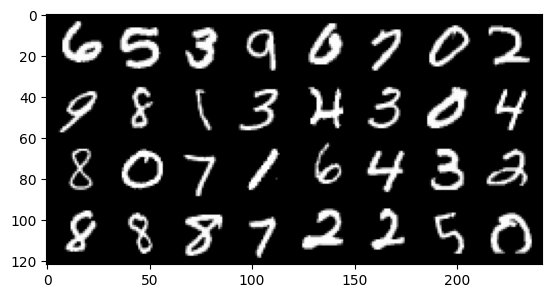

In [16]:
# Displays an image
def imshow(img):
    npimg = img.numpy()
    timg = numpy.transpose(npimg, (1, 2, 0))
    plt.imshow(timg)


# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

Let's check the dimensions of a batch:

In [17]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)

    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


## 2.3. Building the Model

Let's build a convolutional neural network with one convolutional layer:

1. The model below consists of an `__init__()` portion (the class constructor) which is where the individual layers and components of the neural network are conventionally placed. In our model, we have a convolutional layer created by `nn.Conv2d(...)`. We are dealing with an image dataset that is in grayscale so we only need one channel going in, hence `in_channels=1`. We hope to get a rich feature representation from this layer, so we use `out_channels=32`. Kernel size is set to 3, and for the rest of the parameters we use the default values which you can find in the [official documentation for conv2d](https://pytorch.org/docs/stable/nn.html?highlight=conv2d#conv2d).

2. We use two back to back dense layers (also called fully connected layers (FN)) to the data incoming from the convolutional layer. For the first, 128 represents the output dimension, and `26*26*32` represents the dimension of the incoming data, which seems arbitry at first glance. If you would like to find out how to calculate these numbers refer to the [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d). The same applies to the second linear transformation (`d2`), where the dimension of the output of the previous FN layer is the input to the second FN layer, defined as `in_features=128`. `10` is just the size of the output, and since this is the last layer it corresponds to the number of classes.

3. After each one of these layers, we also apply an activation function such as `ReLU`, without which we'd only have a series a linear transformations. For classification purposes, we then apply a `softmax` layer to the last transformation and return its output.

Remember that keeping track of tensor dimensions helps avoid many potential errors!

In [18]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim=1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)

        return out

We can test the model on a single batch to ensure that the output dimensions are what we expect.

In [19]:
# Test the model on a single batch
model = MyModel()

for images, labels in trainloader:
    print(f"Batch size: {images.shape}")

    out = model(images)
    print(f"Output shape: {out.shape}")

    break

Batch size: torch.Size([32, 1, 28, 28])
Output shape: torch.Size([32, 10])


## 2.4. Training the Model
Now we are ready to train the model but before that we are going to set up a loss function, an optimizer and a function to compute the accuracy of the model.

In [20]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 5


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = MyModel()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [21]:
# Compute accuracy
def get_accuracy(output, target, batch_size):
    """Obtain accuracy for training round"""
    corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / batch_size

    return accuracy.item()

In [22]:
# Compute accuracy
def get_accuracy(output, target, batch_size):
    """Obtain accuracy for training round"""
    corrects = (torch.argmax(output, 1) == target).sum()
    accuracy = 100.0 * corrects / batch_size

    return accuracy.item()

Now we train the model:

In [23]:
model.train(True)

for epoch in range(NUM_EPOCHS):
    train_running_loss = 0.0
    train_acc = 0.0

    # Training loop
    for i, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass + backpropagation + loss
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()

        # Update model parameters
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)

    print(
        f"Epoch: {epoch: d} | Loss: {train_running_loss:.4f} | Train Accuracy: {train_acc / i:.2f}"
    )

Epoch:  0 | Loss: 3032.2078 | Train Accuracy: 84.74
Epoch:  1 | Loss: 2798.8611 | Train Accuracy: 97.11
Epoch:  2 | Loss: 2779.3461 | Train Accuracy: 98.09
Epoch:  3 | Loss: 2771.0022 | Train Accuracy: 98.46
Epoch:  4 | Loss: 2765.1476 | Train Accuracy: 98.77


## 2.5. Evaluating the Model

We can also compute accuracy on the testing dataset to see how well the model performs on unseen data. As you can see below, our basic CNN model is performing "well" on the MNIST classification task.

In [24]:
model.train(False)
test_acc = 0.0
pred, real = list(), list()


for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)

    real.append(labels.cpu())
    pred.append(outputs.cpu())

print(f"Test Accuracy: {test_acc/i:.2f}")

Test Accuracy: 98.13


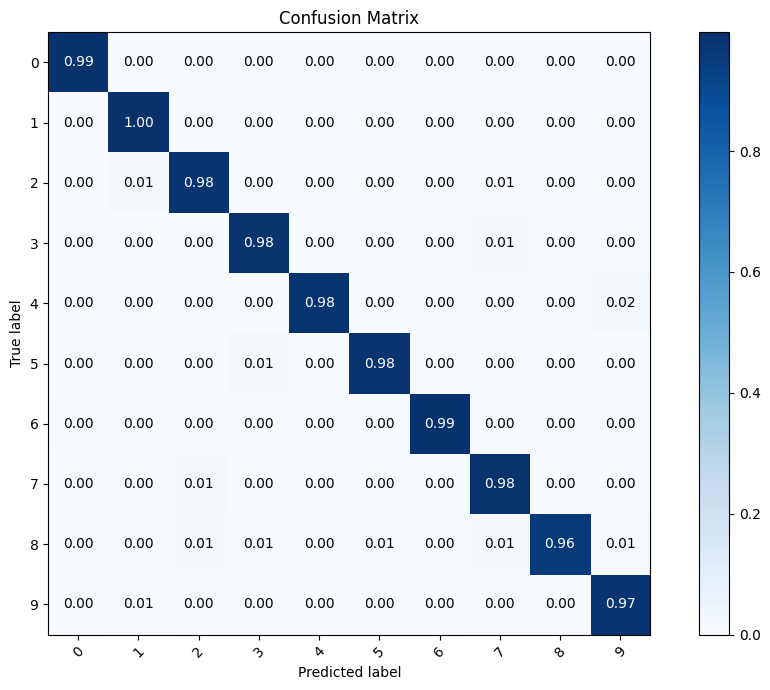

In [25]:
conf_mat = torchmetrics.ConfusionMatrix(
    task="multiclass", num_classes=10, normalize="true"
)
confusion_matrix = conf_mat(torch.cat(pred), torch.cat(real))

classes = [str(i) for i in range(10)]
df_cm = pd.DataFrame(confusion_matrix.numpy(), index=classes, columns=classes)

# Plot confusion matrix heatmap using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(df_cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = numpy.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Loop over data dimensions and create text annotations
fmt = '.2f'
thresh = df_cm.values.max() / 2.
for i, j in numpy.ndindex(df_cm.shape):
    plt.text(j, i, format(df_cm.iloc[i, j], fmt),
             ha="center", va="center",
             color="white" if df_cm.iloc[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# 3. Classification on the CIFAR-10 Dataset

In this example, we will use the CIFAR-10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

![sing_layer](https://pytorch.org/tutorials/_images/cifar10.png)

This example is largely similar to the previous one and is presented here as an exercise. In other words, comments with clues are left in the code that need to be substituted with working code. Such comments will start with `# TODO:` indicating that you should insert code in that place. For inspiration, you are encouraged to look back at the MNIST example as the approach is nearly identical.

## 3.1. Getting the Data

In [ ]:
# TODO: choose a batch size
BATCH_SIZE = ...
DATA_FOLDER = "./data"


transform = transforms.Compose(
    # Look here to understand the normalization values: https://github.com/kuangliu/pytorch-cifar/issues/19
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(
    root=DATA_FOLDER, train=True, download=True, transform=transform
)
# TODO: define a training dataset loader
trainloader = ...

testset = torchvision.datasets.CIFAR10(
    root=DATA_FOLDER, train=False, download=True, transform=transform
)
# TODO: define a testing dataset loader
testloader = ...

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

Let us visualize some of the training images:

In [ ]:
def imshow(img):
    # Reverse normalization
    img = img / 2 + 0.5
    npimg = img.numpy()

    plt.imshow(numpy.transpose(npimg, (1, 2, 0)))
    plt.show()


# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(" ".join(f"{classes[labels[j]]:10s}" for j in range(BATCH_SIZE)))

## 3.2. Define a Convolutional Neural Network


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO: Define a 2D convolutional layer with 3 input channels, 6 output channels
        #   and a kernel size of 5
        self.conv1 = ...

        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(6, 16, 5)

        # TODO: Define a linear layer that takes 16 * 5 * 5 input features and outputs 120 features
        self.fc1 = ...

        self.fc2 = nn.Linear(120, 84)

        # TODO: Define the output layer
        self.fc3 = ...

    def forward(self, x):
        # TODO: Write the code that applies the two convolutional layers, applies non-linearities to them,
        #   and applies the same max pooling to both of them.
        x = ...
        x = ...

        x = torch.flatten(x, 1)  # Flatten all dimensions except batch

        # TODO: Apply the first two fully connected layers and non-linearities
        x = ...
        x = ...

        # Here we'll leave out the softmax
        x = self.fc3(x)

        return x


net = Net()

## 3.3. Train the network

In [ ]:
# TODO: Pick a learning rate
LEARNING_RATE = ...

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [ ]:
net.train(True)

# TODO: Pick the number of epochs
NUM_EPOCHS = ...

for epoch in range(NUM_EPOCHS):  # Loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # TODO: Zero the parameter gradients
        ...

        # TODO: Do a forward pass
        ...

        # TODO: Calculate the loss
        ...

        # TODO: Do a backward pass
        ...

        # TODO: Call the optimizer to adjust the weights
        ...

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

print("Finished Training")

## 3.4. Test the network on the test data

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

As a first step, let us display an image from the test set to get familiar.

In [ ]:
net.train(False)

dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join(f"{classes[labels[j]]:5s}" for j in range(4)))

In [ ]:
# Get the model predictions
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join(f"{classes[predicted[j]]:5s}" for j in range(4)))

Get the accuracy:

In [ ]:
correct = 0
total = 0

pred, real = list(), list()

for data in testloader:
    images, labels = data

    # Calculate outputs by running images through the network
    outputs = net(images)

    # The class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    real.append(labels)
    pred.append(predicted)

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Get the confusion matrix:

In [ ]:
conf_mat = torchmetrics.ConfusionMatrix(
    task="multiclass", num_classes=10, normalize="true"
)
confusion_matrix = conf_mat(torch.cat(pred), torch.cat(real))

df_cm = pd.DataFrame(confusion_matrix.cpu().numpy(), index=classes, columns=classes)

# Plot confusion matrix heatmap using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(df_cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = numpy.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Loop over data dimensions and create text annotations
fmt = '.2f'
thresh = df_cm.values.max() / 2.
for i, j in numpy.ndindex(df_cm.shape):
    plt.text(j, i, format(df_cm.iloc[i, j], fmt),
             ha="center", va="center",
             color="white" if df_cm.iloc[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# 4. Grad-CAM Example

Grad-CAM stands for *Gradient-weighted Class Activation Mapping* which is technique for producing visual representations for what CNN models deemed important for them to assign a particular class to an input. It uses the gradients of any target concept flowing into the final convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the concept.

We present here a quick demonstration for us to get an intuition for the network's inner workings, for details consult the [paper](https://arxiv.org/pdf/1610.02391.pdf).

Install the required library:

In [26]:
!pip install grad-cam==1.4.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38240 sha256=d4a8cfe77775da51c2707ffab99e40b20cee2592caf0ad79e3fe7976951010ac
  Stored in directory: /root/.cache/pip/wheels/3c/6c/04/9a543775e9f25f6c441180a552456f1696167439459730ff87
Successfully built grad-cam


Import libraries:

In [27]:
from pytorch_grad_cam import GradCAM

from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

import urllib.request

from PIL import Image

Let's start by downloading an image and displaying it:

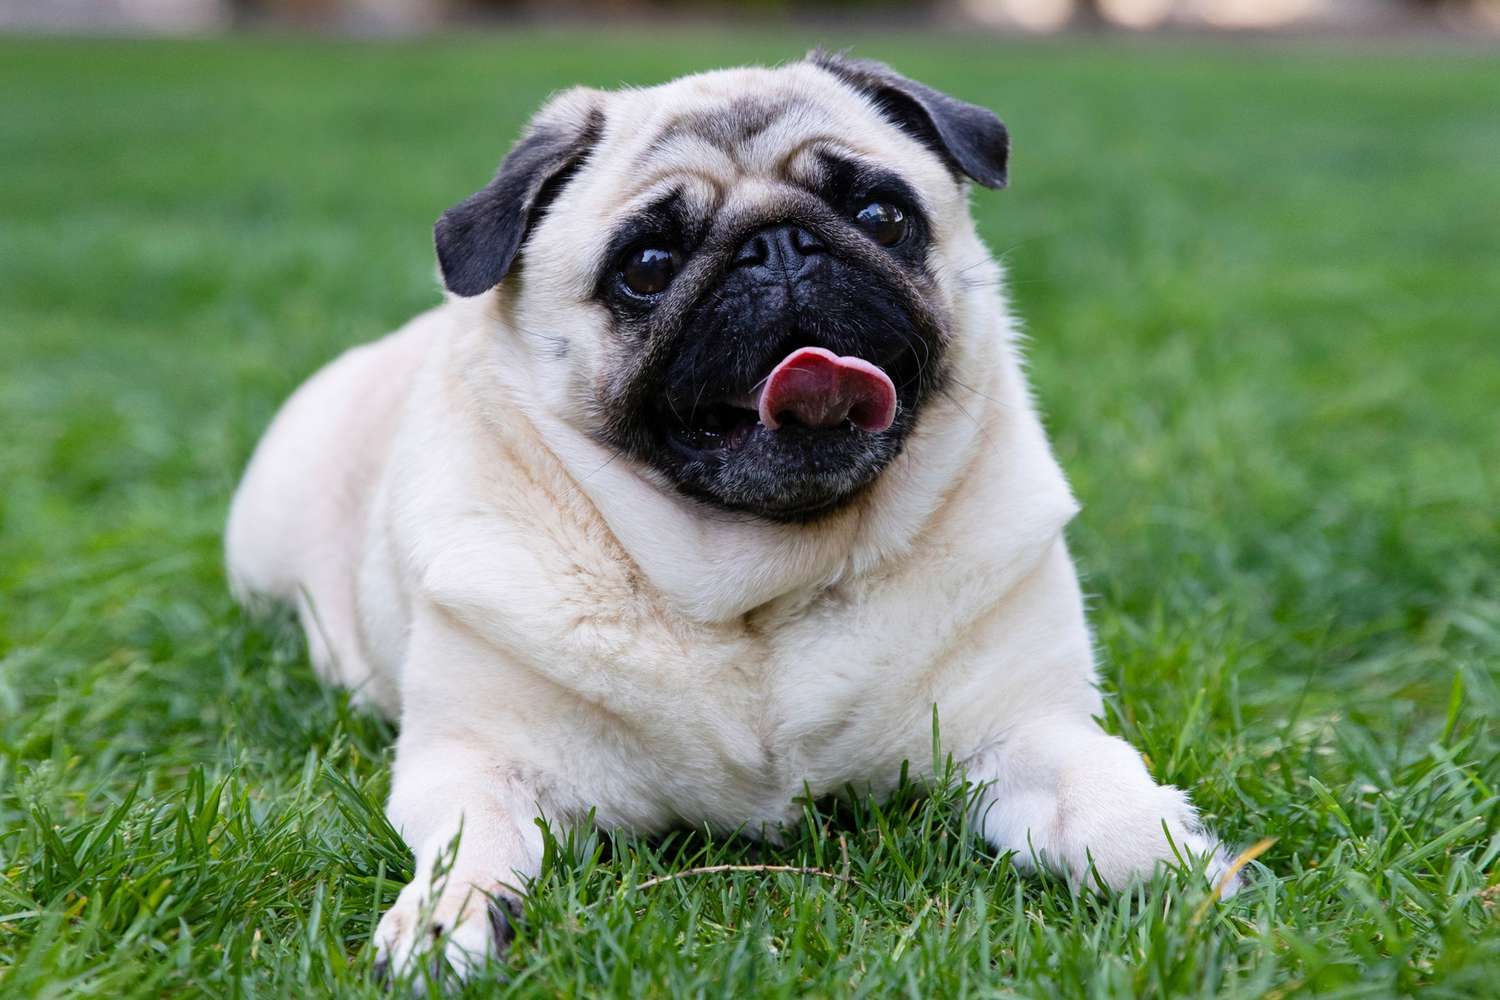

In [28]:
DATA_FOLDER = "./data"
IMG_URL = "https://www.thesprucepets.com/thmb/7TDhfkK5CAKBWEaJfez6607J48Y=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg"

img_path = f"{DATA_FOLDER}/img.jpg"

# Get the image
urllib.request.urlretrieve(IMG_URL, img_path)

# Open it and display it
img = Image.open(img_path)
display(img)

We'll be using the ResNet50 model which comes prepackaged with the torchvision library. However, to get the class labels we have to download them from a different place.

In [29]:
classes_url = "https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt"
file_name = f"{DATA_FOLDER}/resnet50_classes.txt"

urllib.request.urlretrieve(classes_url, file_name)
with open(file_name, "r") as in_stream:
    class_labels = eval(" ".join(in_stream.readlines()))

# This gives us a dictionary with integers as keys and class labels as values
101, class_labels[101]

(101, 'tusker')

Now we construct the necessary objects and apply Grad-CAM:

In [30]:
# Create the pretrained model
model = resnet50(pretrained=True)
# Choose the layer we'll apply Grad-CAM to
target_layers = [model.layer4[-1]]

# All torchvision model have the same following normalization parameters
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# Construct the CAM object
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 99.0MB/s]


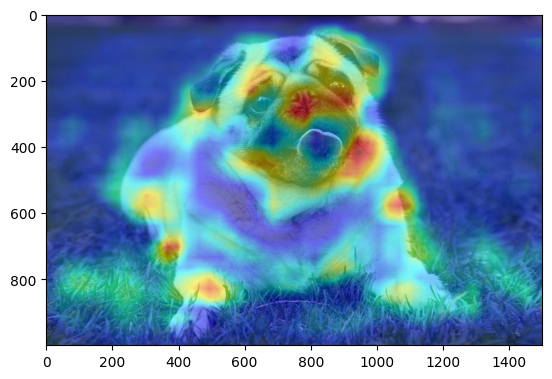

In [31]:
# Transform the image and add the batch dimension
input_tensor = transform(img).unsqueeze(dim=0)

grayscale_cam = cam(input_tensor=input_tensor, targets=None)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]

# Visualize the image with the activations overlayed
rgb_img = numpy.array(img) / 255
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
_ = plt.imshow(visualization)

As Grad-CAM doesn't give us the classification result, we'll run the image through the network once more to make sure the image was classified correctly.

In [32]:
with torch.no_grad():
    output = torch.nn.functional.softmax(
        model(transform(img).float().unsqueeze(dim=0).cuda()), dim=1
    )

class_chosen = float(torch.argmax(output).cpu())
class_labels[class_chosen]

'pug, pug-dog'